In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
#Loading the dataset
(train_ds , train_labels),(test_ds,test_labels) = tfds.load("tf_flowers",
                                                            split=["train[:70%]","train[:30%]"],
                                                            batch_size=-1,
                                                            as_supervised = True)

#Resizing images
train_ds = tf.image.resize(train_ds,(150,150))
test_ds = tf.image.resize(test_ds,(150,150))

#trainsforming the labels to correct format
train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

#loading VGG16 model
vgg_model = VGG16(weights = "imagenet",
              include_top = False,
              input_shape = train_ds[0].shape)
vgg_model.trainable = False

train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Flatten_layer = layers.Flatten()
dense_1 = layers.Dense(50, activation='relu')
dense_2 = layers.Dense(20, activation='relu')
pred_layer = layers.Dense(5, activation='softmax')

model = models.Sequential([vgg_model,
                           Flatten_layer,
                           dense_1,
                           dense_2,
                           pred_layer])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


es = EarlyStopping(monitor='val_accuracy', mode='max',patience= 5,  restore_best_weights=True)

history = model.fit(train_ds, train_labels, epochs=20, validation_split=0.2, batch_size=32, callbacks=[es])

Epoch 1/20
65/65 [==============================] - 7s 93ms/step - loss: 0.1651 - accuracy: 0.9518 - val_loss: 2.3421 - val_accuracy: 0.6829
Epoch 2/20
65/65 [==============================] - 6s 91ms/step - loss: 0.0988 - accuracy: 0.9698 - val_loss: 2.6051 - val_accuracy: 0.6984
Epoch 3/20
65/65 [==============================] - 6s 88ms/step - loss: 0.0964 - accuracy: 0.9732 - val_loss: 2.2249 - val_accuracy: 0.7082
Epoch 4/20
65/65 [==============================] - 6s 89ms/step - loss: 0.0429 - accuracy: 0.9873 - val_loss: 2.2126 - val_accuracy: 0.7237
Epoch 5/20
65/65 [==============================] - 6s 87ms/step - loss: 0.0303 - accuracy: 0.9912 - val_loss: 2.2114 - val_accuracy: 0.7121
Epoch 6/20
65/65 [==============================] - 6s 90ms/step - loss: 0.0205 - accuracy: 0.9946 - val_loss: 2.1982 - val_accuracy: 0.7198
Epoch 7/20
65/65 [==============================] - 6s 89ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 2.2376 - val_accuracy: 0.7276
Epoch 8/20
65

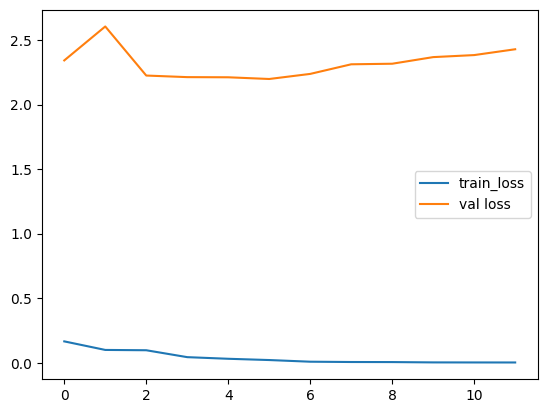

In [ ]:
# Plot the Loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

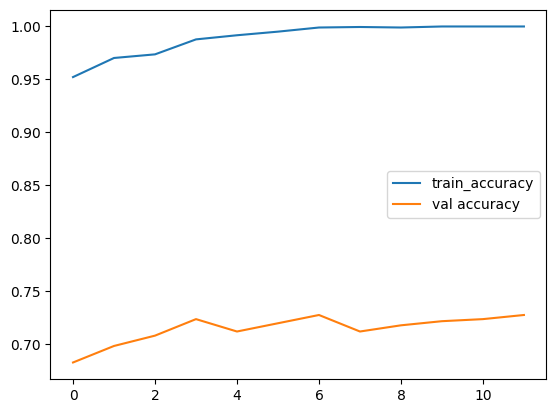

In [ ]:
# Plot the Loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'train_accuracy')
plt.plot(history.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('accuracyVal_accuracy')